<a href="https://colab.research.google.com/github/mushroom3969/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Titanic - Machine Learning from Disaster

url : https://www.kaggle.com/c/titanic/data

# Table Introduction

* survival(Survival) - 0 = No, 1 = Yes

* pclass(Ticket class) - 1 = 1st, 2 = 2nd, 3 = 3rd

  pclass: A proxy for socio-economic status (SES)
 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower
* sex(Sex)
* Age(Age) - in years

  Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp	# of siblings / spouses aboard the Titanic

   The dataset defines family relations in this way...

  Sibling = brother, sister, stepbrother, stepsister
  Spouse = husband, wife (mistresses and fiancés were ignored)

* parch	# of parents / children aboard the Titanic
  The dataset defines family relations in this way...

  Parent = mother, father
  Child = daughter, son, stepdaughter, stepson
  Some children travelled only with a nanny, therefore parch=0 for them.
* ticket	(Ticket number)
* fare	(Passenger fare)
* cabin	(Cabin number)
* embarked	(Port of Embarkation) -	C = Cherbourg, Q = Queenstown, S = Southampton




----
# Loading Data

## Download

In [85]:
from pathlib import Path
import requests

train_url = "https://raw.githubusercontent.com/mushroom3969/Kaggle/main/Titanic/titanic/train.csv"
test_url = "https://raw.githubusercontent.com/mushroom3969/Kaggle/main/Titanic/titanic/test.csv"
gender_submit_url = "https://github.com/mushroom3969/Kaggle/blob/main/Titanic/titanic/gender_submission.csv"


def download_data(url, path, filename):
  if Path(filename).is_file():
    print(f"{filename} already exist")
  else:
    req = requests.get(url)
    with open(filename, "wb") as f:
      print(f"Starting download {filename}")
      f.write(req.content)


download_data(train_url, "/content/Titanic/train.csv", "train.csv")
download_data(test_url, "/content/Titanic/test.csv", "test.csv")
download_data(gender_submit_url, "/content/Titanic/gender_submission.csv", "gender_submisson.csv")

train.csv already exist
test.csv already exist
gender_submisson.csv already exist


## Check Encoding & Size

In [2]:
import chardet
import os
import numpy as np


def check_encode_size(filename):
  line = '{:<25} {:<10} {}'.format

  # for each file, print its name, encoding & confidence in the encoding
  print(line('File Name', 'Encoding', 'Confidence'))

  for filepath in Path(filename).glob('*'):
    result = chardet.detect(filepath.read_bytes())
    print(line(str(filepath), result['encoding'], result['confidence']))
  print()
  kib = 1024
  line = '{:<25} {}'.format
  print(line('File', 'Size (KiB)'))
  for filepath in Path(filename).glob('*'):
      size = os.path.getsize(filepath)
      print(line(str(filepath), np.round(size / kib)))

check_encode_size("Titanic")

File Name                 Encoding   Confidence

File                      Size (KiB)


In [3]:
import pandas as pd

origin_df = pd.read_csv("train.csv", index_col=0)
origin_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
origin_df.shape, origin_df.columns

((891, 11),
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

# Data Cleaning


## Missing Data

Distribution of data only missing values compare with all

we compare with:
* Age : We **drop age first**
* cabin : There is too many category of Cabin we **drop this feature first**

No Embarked because it only has two missing data
* **drop** embarked

In [5]:
isna_df = origin_df.isna()
isna_df.sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
embark_na_df = origin_df.loc[(isna_df["Embarked"])]
age_na_df = origin_df.loc[(isna_df["Age"])]
cabin_na_df = origin_df.loc[(isna_df["Cabin"])]

Text(0.5, 1.0, 'NA_cabin')

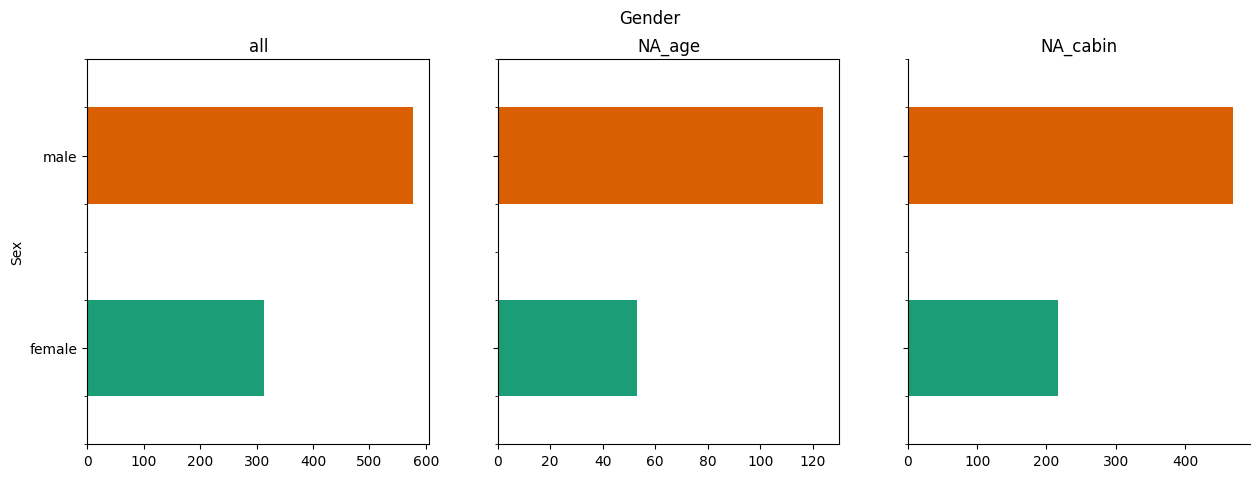

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Gender')

origin_df.groupby('Sex').size().plot(ax=axes[0], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

age_na_df.groupby('Sex').size().plot(ax=axes[1], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df.groupby('Sex').size().plot(ax=axes[2], kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")


Text(0.5, 1.0, 'NA_cabin')

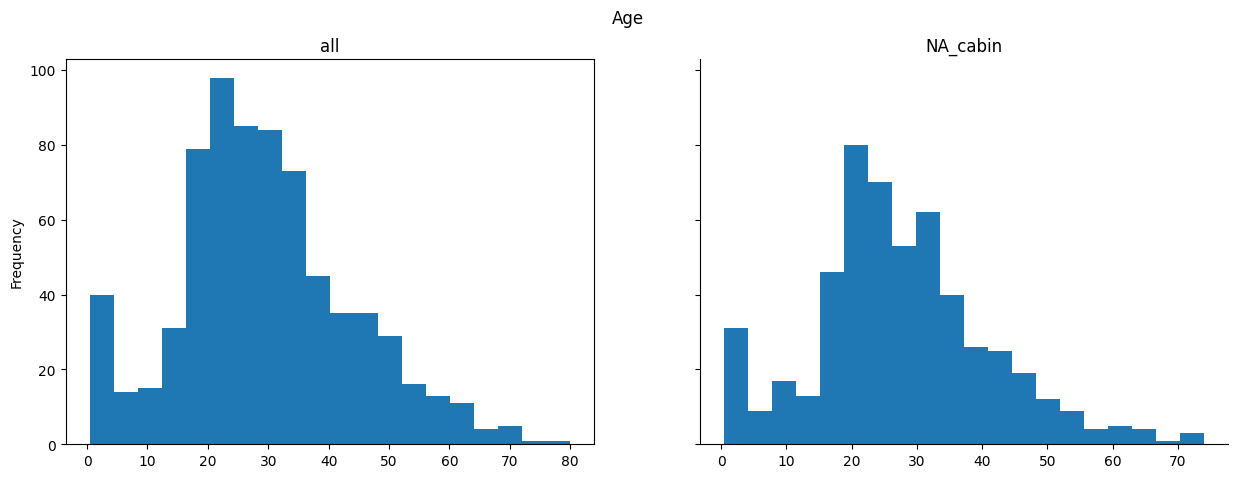

In [8]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Age')

origin_df['Age'].plot(ax=axes[0], kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

cabin_na_df['Age'].plot(ax=axes[1], kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

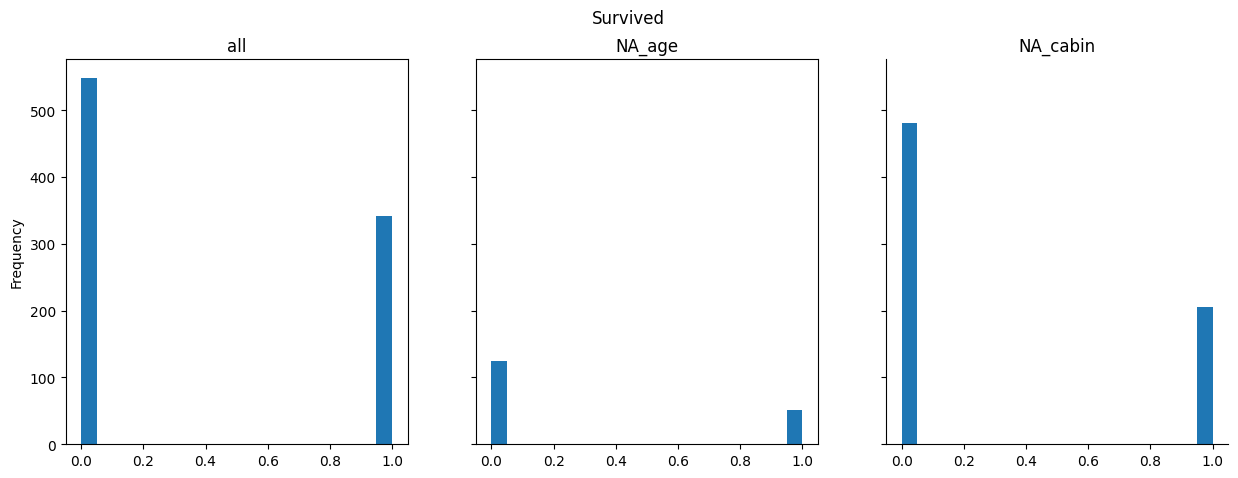

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Survived')

origin_df['Survived'].plot(ax=axes[0], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("all")

age_na_df['Survived'].plot(ax=axes[1], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Survived'].plot(ax=axes[2], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")


Text(0.5, 1.0, 'NA_cabin')

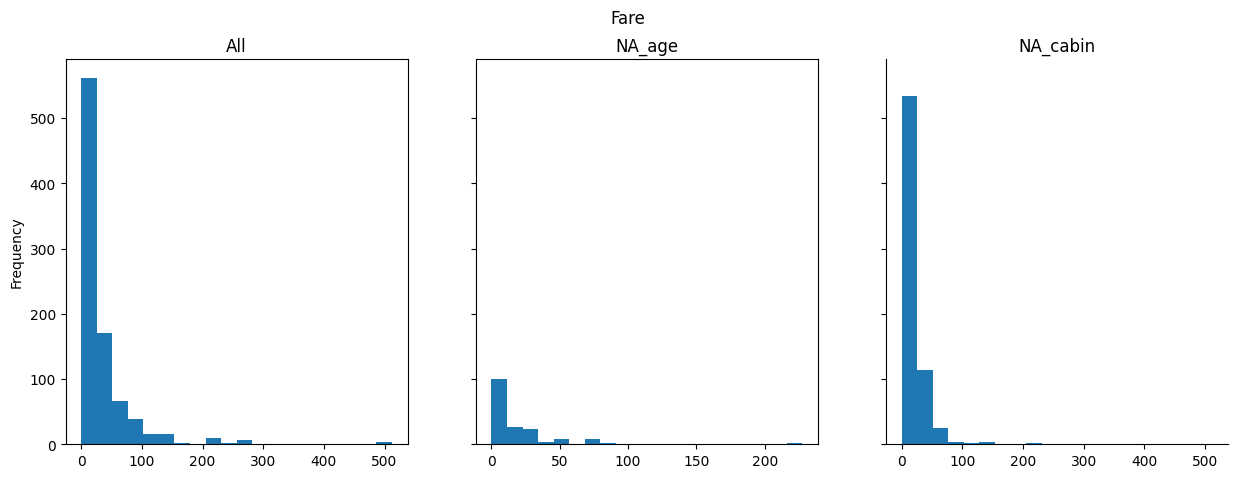

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Fare')

origin_df['Fare'].plot(ax=axes[0], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['Fare'].plot(ax=axes[1], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Fare'].plot(ax=axes[2], kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

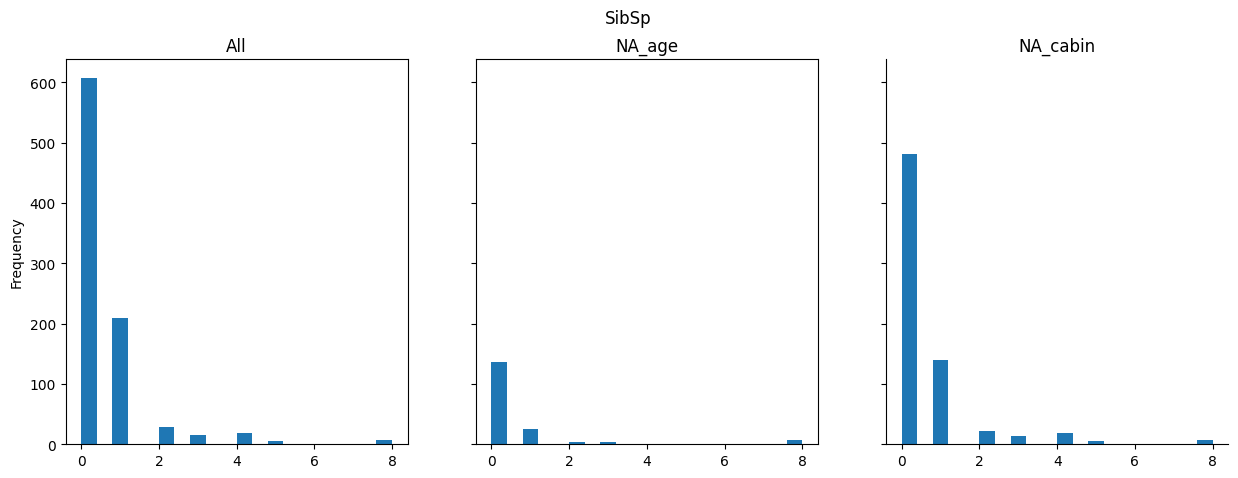

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('SibSp')

origin_df['SibSp'].plot(ax=axes[0], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['SibSp'].plot(ax=axes[1], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['SibSp'].plot(ax=axes[2], kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

Text(0.5, 1.0, 'NA_cabin')

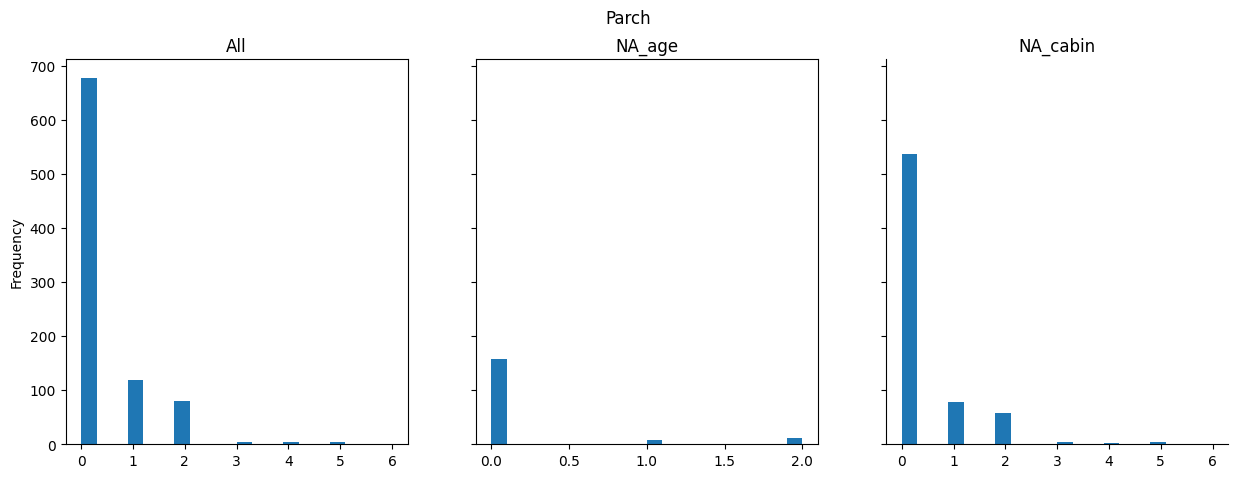

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Parch')

origin_df['Parch'].plot(ax=axes[0], kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("All")

age_na_df['Parch'].plot(ax=axes[1], kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("NA_age")

cabin_na_df['Parch'].plot(ax=axes[2], kind='hist', bins=20, title='Parch')
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("NA_cabin")

## Checking Duplicate

In [13]:
sum(~origin_df.duplicated()) == origin_df.shape[0]

True

# Select Feature V1
* Survived
* Pclass
* Sex
* SibSp
* Parch
* Fare

🛑 NO `Age` `Cabin` `Embarked` `Name` `Ticket`

In [14]:
v1_feature = ["Survived",	"Pclass",	"Sex",	"SibSp",	"Parch","Fare"]

v1_df = origin_df.loc[:, v1_feature]
v1_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,male,1,0,7.2500
2,1,1,female,1,0,71.2833
3,1,3,female,0,0,7.9250
4,1,1,female,1,0,53.1000
5,0,3,male,0,0,8.0500


----

## Is there any features associate with survived?

* would survived base in scatter
 * **Female**
 * **high class**

*  would dead base in scatter
 * **high sibsp**
 * **high parch**

In [15]:
import random

def jitter(x):
  """
  jitter a vector

  arg:
  x vector which is not jitter

  return:
  a jitter's vector
  """
  return x.map(lambda x : x + random.uniform(-0.1, 0.1))

jitter_surv = jitter(v1_df.Survived)

Text(0.5, 1.0, 'Fare & Parch')

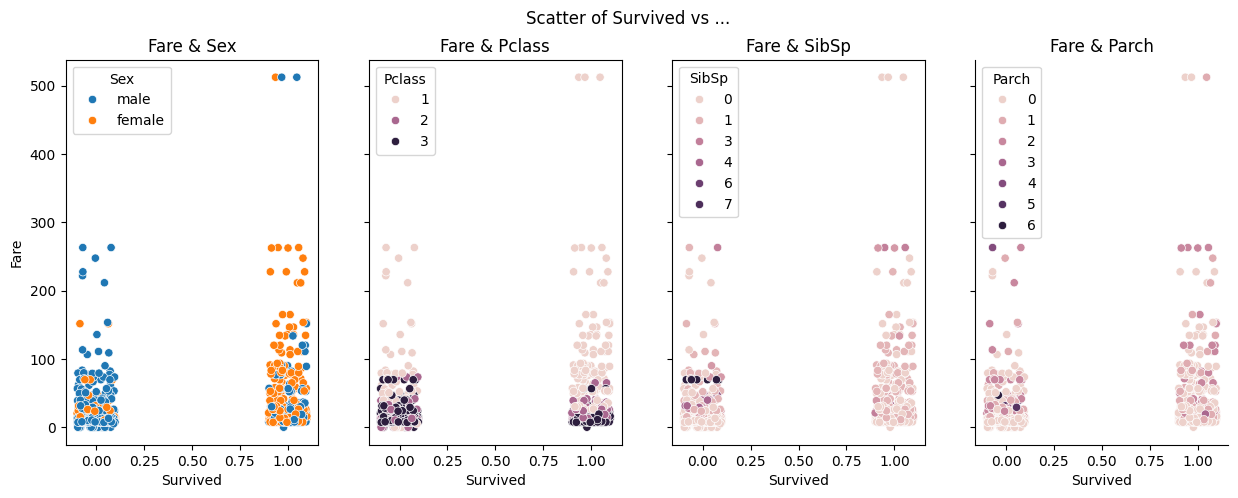

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Scatter of Survived vs ...')

sns.scatterplot(ax=axes[0], data=v1_df, x=jitter_surv, y="Fare", hue="Sex",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Fare & Sex")

sns.scatterplot(ax=axes[1], data=v1_df, x=jitter_surv, y="Fare", hue="Pclass",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Fare & Pclass")

sns.scatterplot(ax=axes[2], data=v1_df, x=jitter_surv, y="Fare", hue="SibSp",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[2].set_title("Fare & SibSp")

sns.scatterplot(ax=axes[3], data=v1_df, x=jitter_surv, y="Fare", hue="Parch",)
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[3].set_title("Fare & Parch")

In [17]:
def group_prop(df, g):
  total = len(df)
  df["count"] = np.ones(total)
  return df.loc[:, ["Survived", g, "count"]].groupby(["Survived", g]).agg(sum) / total

### Sex

count
Survived Sex             
0        female  0.090909
         male    0.525253
1        female  0.261504
         male    0.122334

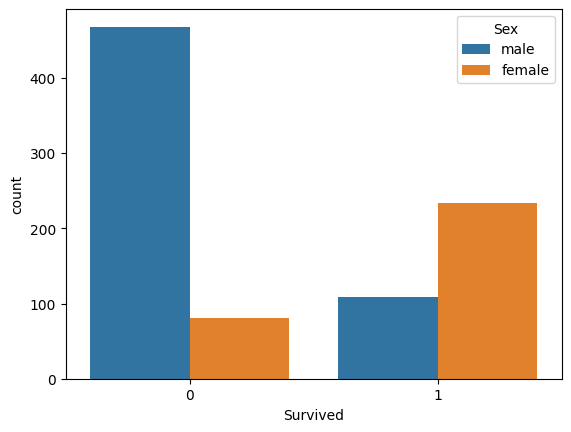

In [18]:
import plotly.express as px

sns.countplot(data=v1_df, x="Survived", hue="Sex")
group_prop(v1_df, "Sex")


### Pclass

count
Survived Pclass          
0        1       0.089787
         2       0.108866
         3       0.417508
1        1       0.152637
         2       0.097643
         3       0.133558

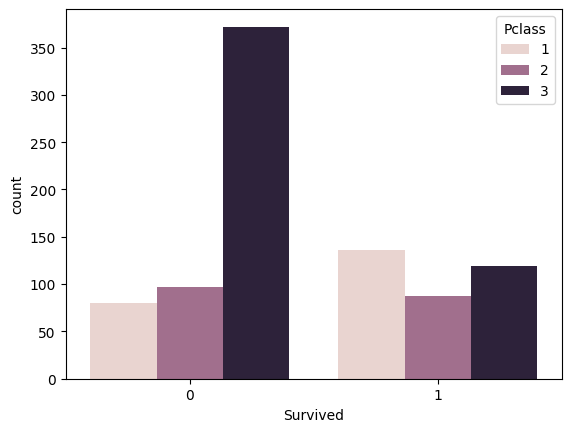

In [19]:
sns.countplot(data=v1_df, x="Survived", hue="Pclass")
group_prop(v1_df, "Pclass")

### Sibsp

count
Survived SibSp          
0        0      0.446689
         1      0.108866
         2      0.016835
         3      0.013468
         4      0.016835
         5      0.005612
         8      0.007856
1        0      0.235690
         1      0.125701
         2      0.014590
         3      0.004489
         4      0.003367

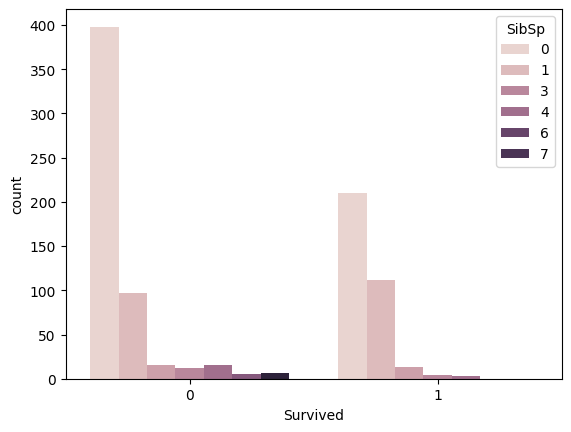

In [20]:
sns.countplot(data=v1_df, x="Survived", hue="SibSp")
group_prop(v1_df, "SibSp")

### Parch

count
Survived Parch          
0        0      0.499439
         1      0.059484
         2      0.044893
         3      0.002245
         4      0.004489
         5      0.004489
         6      0.001122
1        0      0.261504
         1      0.072952
         2      0.044893
         3      0.003367
         5      0.001122

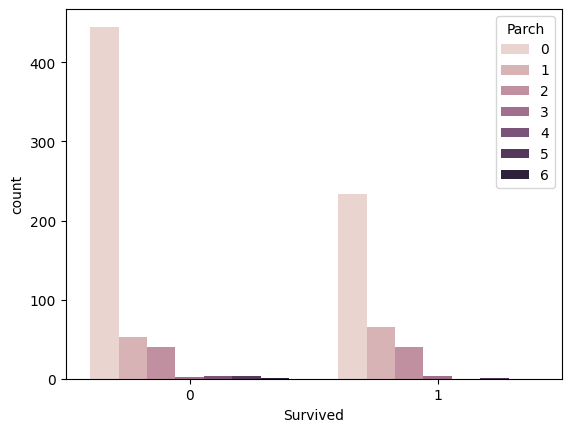

In [21]:
sns.countplot(data=v1_df, x="Survived", hue="Parch")
group_prop(v1_df, "Parch")

## Model_1

In [22]:
X = v1_df.iloc[:, 1:-1]
y = v1_df.iloc[:, 0]

X.shape, y.shape

((891, 5), (891,))

### preprocessing

In [23]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,
1,3,male,1,0,7.2500
2,1,female,1,0,71.2833
3,3,female,0,0,7.9250
4,1,female,1,0,53.1000
5,3,male,0,0,8.0500


In [24]:
from sklearn.pipeline import Pipeline            # 用以包裝成pipeline
from sklearn.compose import ColumnTransformer    # 用以整合欄位進行轉換
from sklearn.impute import SimpleImputer         # 用以進行補值前處理
from sklearn.preprocessing import StandardScaler # 用以進行標準化前處理
from sklearn.preprocessing import OneHotEncoder  # 用以進行編碼前處理

numeric_transformer = Pipeline(steps=[
    ("scalar", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Fare']),
        ('cat', categorical_transformer, ['Sex']),
    ],
    remainder='passthrough'
    )


### Train test split

In [25]:
from sklearn.model_selection import train_test_split


test_size = int(len(v1_df) * 0.2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


preprocessor.fit(X_train)
feature_names_out = preprocessor.get_feature_names_out()

print("Output Feature Names:")
print(feature_names_out)
preprocessor.set_output(transform='pandas')

Output Feature Names:
['num__Fare' 'cat__Sex_female' 'cat__Sex_male' 'remainder__Pclass'
 'remainder__SibSp' 'remainder__Parch']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scalar', StandardScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

### Build model - Logistic_regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression())])

logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex'])])),
                ('classifier', LogisticRegression())])

### Cross_validation

In [27]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.2f}")

Cross-validation scores: [0.81818182 0.8041958  0.78321678 0.76056338 0.83098592]
Average cross-validation score: 0.80


In [28]:
from sklearn.model_selection import GridSearchCV


param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

coefficients = best_model.named_steps['classifier'].coef_[0]

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}")

for feature_name, coefficient in zip(feature_names, coefficients):
    print(f"{feature_name}: {coefficient}")



Best parameters: {'classifier__C': 1}
Best cross-validation score: 0.80
num__Fare: 0.1914030685733406
cat__Sex_female: 1.345359929766337
cat__Sex_male: -1.345573394334556
remainder__Pclass: -0.7500925977269632
remainder__SibSp: -0.25453190266248404
remainder__Parch: -0.09997776119468395


### Evaluation

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_auc_score, f1_score, roc_curve


def pred_evalutation(y_actu, y_pred):
  cm = pd.DataFrame(confusion_matrix(y_actu, y_pred), columns=["pred_true", "pred_false"], index=["actual_true", "actual_false"])
  acc = accuracy_score(y_actu, y_pred)
  recall = recall_score(y_actu, y_pred)
  roc_auc = roc_auc_score(y_actu, y_pred)
  f1 = f1_score(y_actu, y_pred)

  print(f"Confusion Matrix:\n{cm}\n")
  print(f"accuracy\n{acc:.2f}:\n")
  print(f"recall:\n{recall:.2f}\n")
  print(f"roc_auc:\n{roc_auc:.2f}\n")
  print(f"f1:\n{f1:.2f}\n")

In [30]:
pred_evalutation(y_train, grid.predict(X_train))

Confusion Matrix:
              pred_true  pred_false
actual_true         391          53
actual_false         88         181

accuracy
0.80:

recall:
0.67

roc_auc:
0.78

f1:
0.72



In [31]:
y_pred = grid.predict(X_test)
pred_evalutation(y_test, y_pred)

Confusion Matrix:
              pred_true  pred_false
actual_true          89          16
actual_false         22          51

accuracy
0.79:

recall:
0.70

roc_auc:
0.77

f1:
0.73



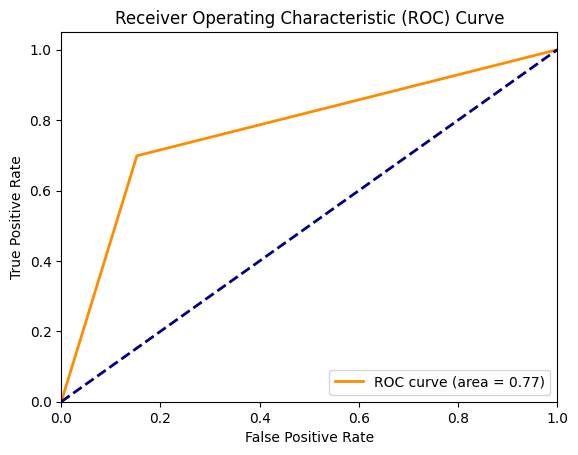

In [32]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
output = pd.DataFrame({'PassengerId': X_test.index, "Survived": y_test,'Survived_pred': y_pred})
output

,PassengerId,Survived,Survived_pred
PassengerId,,,
710,710,1,0
440,440,0,0
841,841,0,0
721,721,1,1
40,40,1,1
...,...,...,...
853,853,0,1
434,434,0,0
774,774,0,0


In [34]:
#output.to_csv('submission.csv', index=False)

## Model_2

### preprocessing

In [35]:
from sklearn.pipeline import Pipeline            # 用以包裝成pipeline
from sklearn.compose import ColumnTransformer    # 用以整合欄位進行轉換
from sklearn.impute import SimpleImputer         # 用以進行補值前處理
from sklearn.preprocessing import StandardScaler # 用以進行標準化前處理
from sklearn.preprocessing import OneHotEncoder  # 用以進行編碼前處理

numeric_transformer = Pipeline(steps=[
    ("scalar", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Fare']),
        ('cat', categorical_transformer, ['Sex']),
    ],
    remainder='passthrough'
    )



### Train test split

In [36]:
from sklearn.model_selection import train_test_split


test_size = int(len(v1_df) * 0.2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

preprocessor.fit(X_train)
feature_names_out = preprocessor.get_feature_names_out()

print("Output Feature Names:")
print(feature_names_out)
preprocessor.set_output(transform='pandas')

Output Feature Names:
['num__Fare' 'cat__Sex_female' 'cat__Sex_male' 'remainder__Pclass'
 'remainder__SibSp' 'remainder__Parch']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scalar', StandardScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

### Building model - SVM

In [37]:
from sklearn.svm import SVC

svc = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', SVC())])

svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex'])])),
                ('classifier', SVC())])

### Cross_validation

In [38]:
from sklearn.model_selection import GridSearchCV


param_grid = {"classifier__kernel" : ["linear", "poly", "rbf"],
              "classifier__C" : [0.1, 1, 10],
              "classifier__gamma" : ['auto', 'scale']}

grid = GridSearchCV(svc, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}")

Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.81


### Evaluation

In [39]:
pred_evalutation(y_train, grid.predict(X_train))

Confusion Matrix:
              pred_true  pred_false
actual_true         400          44
actual_false         86         183

accuracy
0.82:

recall:
0.68

roc_auc:
0.79

f1:
0.74



In [40]:
y_pred = grid.predict(X_test)
pred_evalutation(y_test, y_pred)

Confusion Matrix:
              pred_true  pred_false
actual_true          91          14
actual_false         23          50

accuracy
0.79:

recall:
0.68

roc_auc:
0.78

f1:
0.73



## Model_3


### preprocessing

In [50]:
from sklearn.pipeline import Pipeline            # 用以包裝成pipeline
from sklearn.compose import ColumnTransformer    # 用以整合欄位進行轉換
from sklearn.impute import SimpleImputer         # 用以進行補值前處理
from sklearn.preprocessing import StandardScaler # 用以進行標準化前處理
from sklearn.preprocessing import OneHotEncoder  # 用以進行編碼前處理


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Sex']),
    ],
    remainder='passthrough'
    )



### Train test split

In [51]:
from sklearn.model_selection import train_test_split


test_size = int(len(v1_df) * 0.2)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

preprocessor.fit(X_train)
feature_names_out = preprocessor.get_feature_names_out()

print("Output Feature Names:")
print(feature_names_out)
preprocessor.set_output(transform='pandas')

Output Feature Names:
['num__Fare' 'cat__Sex_female' 'cat__Sex_male' 'remainder__Pclass'
 'remainder__SibSp' 'remainder__Parch']


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scalar', StandardScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

### Building model - RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(random_state=42))])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Cross_validation

In [56]:
from sklearn.model_selection import GridSearchCV


param_grid = {"classifier__n_estimators" : [50, 100, 200,],
              "classifier__criterion" : ["gini", "entropy"]
              }

grid = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}")

Best parameters: {'classifier__criterion': 'entropy', 'classifier__n_estimators': 200}
Best cross-validation score: 0.78


### Evaluation

In [57]:
pred_evalutation(y_train, grid.predict(X_train))
y_pred = grid.predict(X_test)
pred_evalutation(y_test, y_pred)

Confusion Matrix:
              pred_true  pred_false
actual_true         430          14
actual_false         38         231

accuracy
0.93:

recall:
0.86

roc_auc:
0.91

f1:
0.90

Confusion Matrix:
              pred_true  pred_false
actual_true          88          17
actual_false         20          53

accuracy
0.79:

recall:
0.73

roc_auc:
0.78

f1:
0.74



## Model_4

### preprocessing

In [80]:
from sklearn.pipeline import Pipeline            # 用以包裝成pipeline
from sklearn.compose import ColumnTransformer    # 用以整合欄位進行轉換
from sklearn.impute import SimpleImputer         # 用以進行補值前處理
from sklearn.preprocessing import StandardScaler # 用以進行標準化前處理
from sklearn.preprocessing import OneHotEncoder  # 用以進行編碼前處理


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Sex'])
    ],
    remainder='passthrough'
    )


### Train test split

In [95]:
from sklearn.model_selection import train_test_split


#test_size = int(len(v1_df) * 0.2)

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=test_size, random_state=42
#)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = X
y_train = y

preprocessor.fit(X_train)
feature_names_out = preprocessor.get_feature_names_out()

preprocessor.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex'])])

### Building model - XGBOOST

In [96]:
from xgboost import XGBClassifier


xgb = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', XGBClassifier(random_state=42))])

xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               earl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### Cross_validation

In [115]:
from sklearn.model_selection import GridSearchCV


param_grid = {"classifier__n_estimators" : [100, 200],
              "classifier__learning_rate" : [0.3, 1],
              "classifier__min_child_weight" : [0.1, 0.5, 1],
              "classifier__max_depth" : [3, 7, 9],
              "classifier__subsample" : [0.5, 1],
              "classifier__colsample_bytree" : [0.5, 1]
              }

grid = GridSearchCV(xgb, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.2f}")

Best parameters: {'classifier__colsample_bytree': 0.5, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__min_child_weight': 0.1, 'classifier__n_estimators': 200, 'classifier__subsample': 0.5}
Best cross-validation score: 0.81


### Evaluation

In [116]:
pred_evalutation(y_train, grid.predict(X_train))
y_pred = grid.predict(X_test)


Confusion Matrix:
              pred_true  pred_false
actual_true         517          32
actual_false         74         268

accuracy
0.88:

recall:
0.78

roc_auc:
0.86

f1:
0.83



# Selection Feature V2

# Submission

In [117]:
test_df = pd.read_csv("test.csv")
feature = ["Pclass",	"Sex",	"SibSp",	"Parch","Fare"]

test_v1_df = test_df.loc[:, feature]

In [118]:
pred = grid.predict(test_v1_df)

In [119]:
with open('predict2.csv', 'w') as f:
    f.write('PassengerId,Survived\n')
    for i in range(len(pred)): #len(pred)看整個test有多長，然後用for去跑全部
        f.write(str(i + 892) + ',' + str(int(pred[i])) + '\n')

In [120]:
pred_evalutation(pd.read_csv("gender_submission.csv").loc[: , "Survived"], pred)

Confusion Matrix:
              pred_true  pred_false
actual_true         248          18
actual_false         24         128

accuracy
0.90:

recall:
0.84

roc_auc:
0.89

f1:
0.86

